In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

/var/folders/5t/lc4j166d5f9bxc652fwvc0hc0000gn/T/ipykernel_51725/1129658432.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
print(train_df['Date'].dtype)

datetime64[ns]


In [5]:
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [6]:
holiday_mapping = {'0': 'none', 0: 'none', 'a': 'public', 'b': 'easter', 'c':'christmas'}

train_df['StateHoliday'] = train_df['StateHoliday'].map(holiday_mapping)
train_df['StateHoliday'].unique()

array(['none', 'public', 'easter', 'christmas'], dtype=object)

<Axes: xlabel='StateHoliday', ylabel='Sales'>

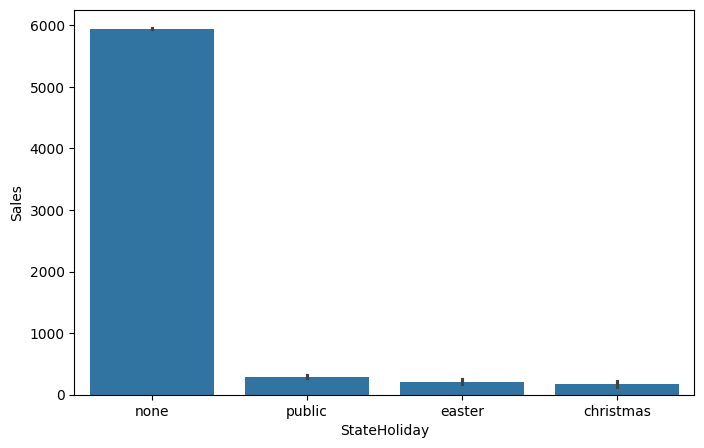

In [7]:
plt.figure(figsize=(8, 5))

sns.barplot(x='StateHoliday', y='Sales', data=train_df)
plt.show()

In [10]:
train_df['IstStateHoliday'] = train_df['StateHoliday'].apply(lambda x: 0 if x == 'none' else 1)

In [6]:
train_df['Open'].unique()

array([1, 0])

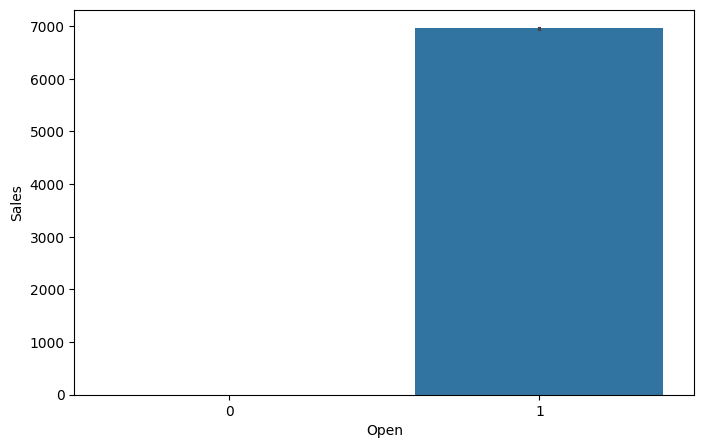

In [12]:
plt.figure(figsize=(8, 5))

sns.barplot(x='Open', y='Sales', data=train_df)
plt.show()

In [7]:
train_df['Promo'].unique()

array([1, 0])

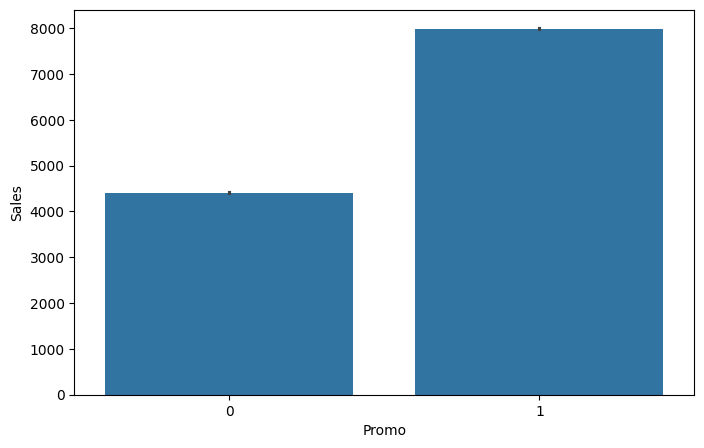

In [13]:
plt.figure(figsize=(8, 5))

sns.barplot(x='Promo', y='Sales', data=train_df)
plt.show()

In [14]:
train_df['SchoolHoliday'].unique()

array([1, 0])

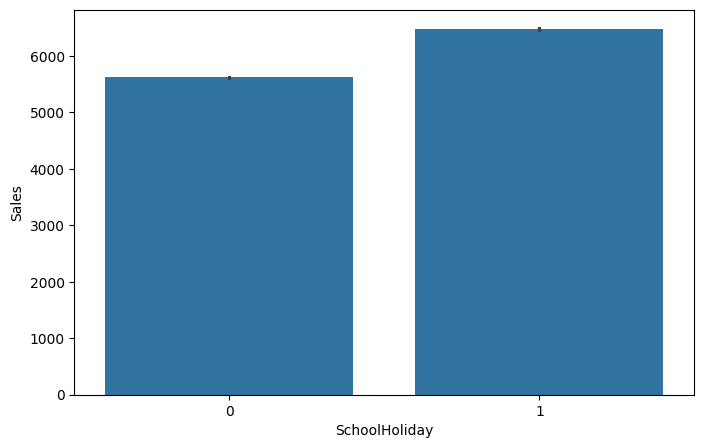

In [16]:
plt.figure(figsize=(8, 5))

sns.barplot(x='SchoolHoliday', y='Sales', data=train_df)
plt.show()

In [18]:
train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

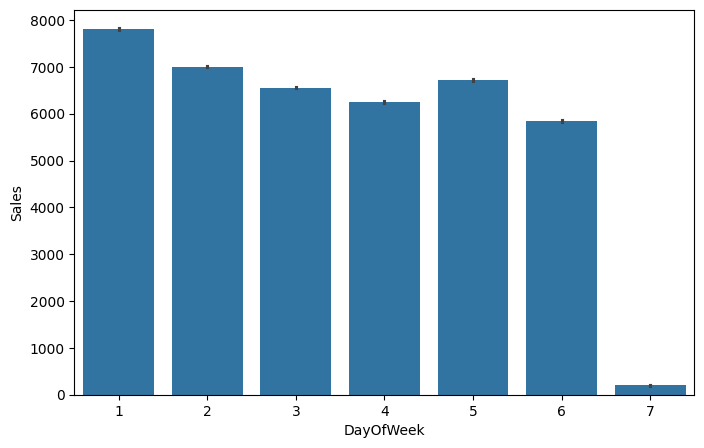

In [19]:
plt.figure(figsize=(8, 5))

sns.barplot(x='DayOfWeek', y='Sales', data=train_df)
plt.show()

In [20]:
train_df.isna().sum()

Store              0
DayOfWeek          0
Date               0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
IstStateHoliday    0
dtype: int64

In [21]:
train_df.duplicated().sum()

np.int64(0)

<Axes: ylabel='Frequency'>

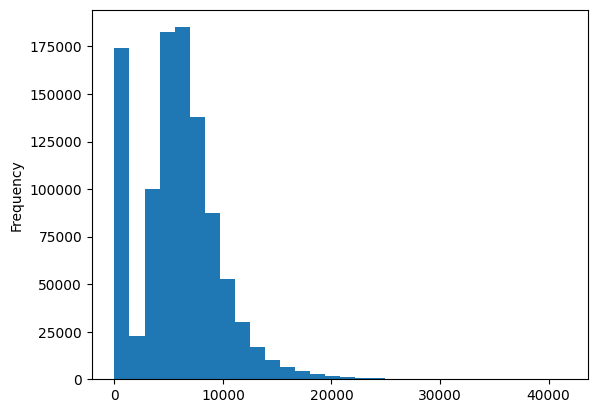

In [22]:
train_df['Sales'].plot.hist(bins=30)

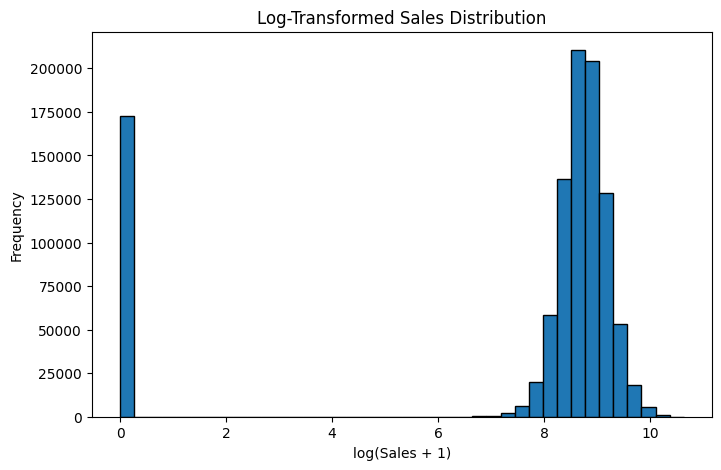

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (adding 1 to avoid log(0))
log_sales = np.log1p(train_df["Sales"])

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(log_sales, bins=40, edgecolor='black')
plt.title("Log-Transformed Sales Distribution")
plt.xlabel("log(Sales + 1)")
plt.ylabel("Frequency")
plt.show()


<Axes: ylabel='Frequency'>

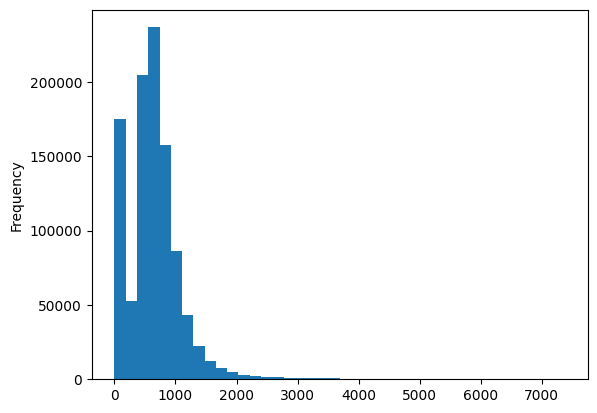

In [24]:
train_df['Customers'].plot.hist(bins=40)

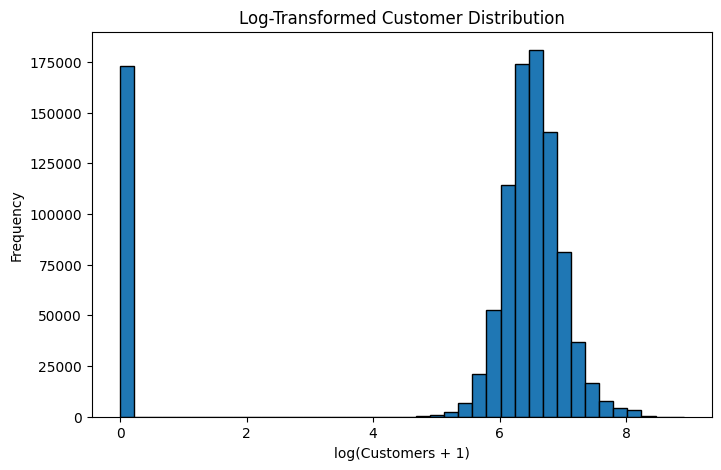

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (adding 1 to avoid log(0))
log_customers = np.log1p(train_df["Customers"])

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(log_customers, bins=40, edgecolor='black')
plt.title("Log-Transformed Customer Distribution")
plt.xlabel("log(Customers + 1)")
plt.ylabel("Frequency")
plt.show()

In [26]:
train_df['LogSales'] = np.log1p(train_df['Sales'])

In [27]:
train_df['LogCustomers'] = np.log1p(train_df['Customers'])

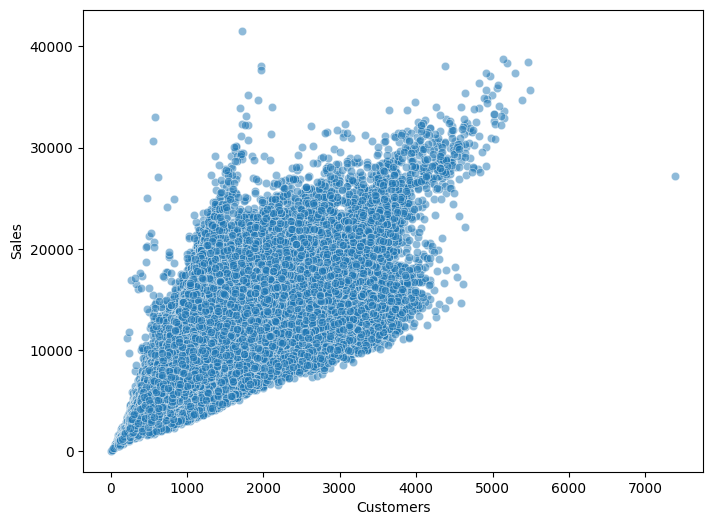

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with transparency
sns.scatterplot(
    x="Customers", 
    y="Sales", 
    data=train_df[train_df['LogSales'] != 0], 
    alpha=0.5  # Adjust transparency to handle overlapping points
)
plt.show()

In [44]:
train_df['Month'] = train_df['Date'].dt.month
train_df['Quarter'] = train_df['Date'].dt.quarter
train_df['Year'] = train_df['Date'].dt.year

train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,IstStateHoliday,LogSales,LogCustomers,Month,Quarter,Year
0,1,5,2015-07-31,5263,555,1,1,none,1,0,8.568646,6.320768,7,3,2015
1,2,5,2015-07-31,6064,625,1,1,none,1,0,8.710290,6.439350,7,3,2015
2,3,5,2015-07-31,8314,821,1,1,none,1,0,9.025816,6.711740,7,3,2015
3,4,5,2015-07-31,13995,1498,1,1,none,1,0,9.546527,7.312553,7,3,2015
4,5,5,2015-07-31,4822,559,1,1,none,1,0,8.481151,6.327937,7,3,2015


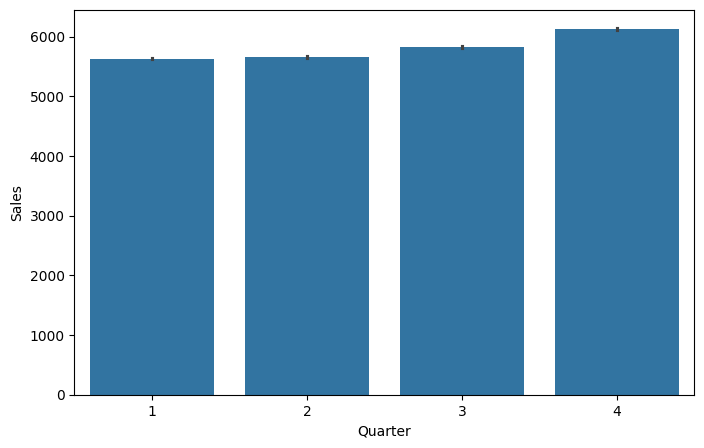

In [29]:
plt.figure(figsize=(8, 5))

sns.barplot(x='Quarter', y='Sales', data=train_df)
plt.show()

<Axes: xlabel='Month'>

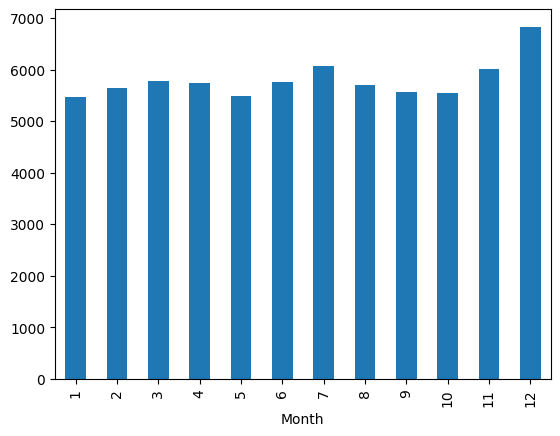

In [43]:
train_df.groupby('Month')['Sales'].mean().plot.bar()

<Axes: xlabel='Year'>

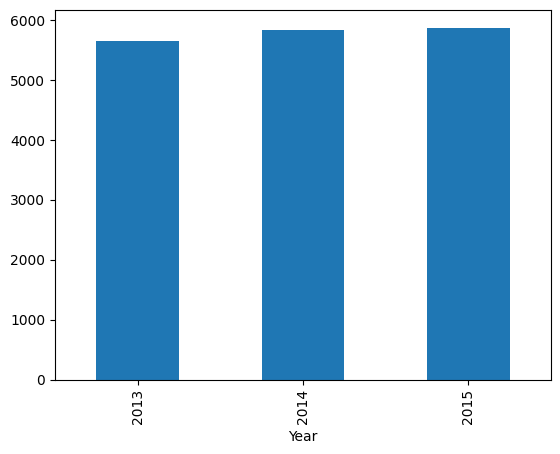

In [45]:
train_df.groupby('Year')['Sales'].mean().plot.bar()

### Insights:

1. Sales are close to 0 during state holidays
2. Promos increase sales on average.
3. When open is 0 sales are 0. Meaning when closed, store makes no sales
4. On average sales go down with the days of the week, with a small spike of sales on friday.
5. Small seasonality trend observed in monthly sales. Sales increase during the months of november and december. 
6. On average sales have not increased over the years.

In [50]:
stores_df = pd.read_csv('store.csv')
stores_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [51]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [52]:
stores_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [53]:
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [54]:
stores_df[pd.isna(stores_df['CompetitionDistance'])]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# In which promo interval are we? First, second, third or fourth?
# Start of promo interval?

 

In [78]:
stores_df['PromoInterval'] = stores_df['PromoInterval'].apply(lambda x: [] if pd.isna(x) else x.split(','))

In [84]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

In [86]:
stores_df['PromoInterval'] = stores_df['PromoInterval'].apply(lambda x: [month_map[month] for month in x] if x else x)

In [95]:
stores_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2Since
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,[],NaT
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"[1, 4, 7, 10]",NaT
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"[1, 4, 7, 10]",NaT
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,[],NaT
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,[],NaT
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"[1, 4, 7, 10]",NaT
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,[],NaT
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,[],NaT
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,[],NaT


In [103]:
def get_promo2_since_date(row):

    if pd.isna(row["Promo2SinceYear"]) or pd.isna(row["Promo2SinceWeek"]):
        return np.nan

    else:
        string_date = str(int(row["Promo2SinceYear"])) + "-" + str(int(row["Promo2SinceWeek"]))+ "-1"
        return pd.to_datetime(string_date, format="%Y-%W-%w")


stores_df['Promo2SinceDate'] = stores_df.apply(get_promo2_since_date, axis=1)

In [104]:
stores_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2Since,Promo2SinceDate
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,[],NaT,NaT
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"[1, 4, 7, 10]",NaT,2010-03-29
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"[1, 4, 7, 10]",NaT,2011-04-04
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,[],NaT,NaT
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,[],NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"[1, 4, 7, 10]",NaT,2013-08-05
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,[],NaT,NaT
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,[],NaT,NaT
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,[],NaT,NaT


In [107]:
stores_df.drop(columns=['Promo2SinceWeek', 'Promo2SinceYear', 'Promo2'], inplace=True)

In [112]:
def get_promo2_since_date(row):

    if pd.isna(row["CompetitionOpenSinceMonth"]) or pd.isna(row["CompetitionOpenSinceYear"]):
        return np.nan

    else:
        string_date = str(int(row["CompetitionOpenSinceYear"])) + "-" + str(int(row["CompetitionOpenSinceMonth"]))+ "-01"
        return pd.to_datetime(string_date)

stores_df['CompetitionOpenSince'] = stores_df.apply(get_promo2_since_date, axis=1)

In [114]:
stores_df.drop(columns=['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'], inplace=True)

In [116]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,PromoInterval,Promo2SinceDate,CompetitionOpenSince
0,1,c,a,1270.0,[],NaT,2008-09-01
1,2,a,a,570.0,"[1, 4, 7, 10]",2010-03-29,2007-11-01
2,3,a,a,14130.0,"[1, 4, 7, 10]",2011-04-04,2006-12-01
3,4,c,c,620.0,[],NaT,2009-09-01
4,5,a,a,29910.0,[],NaT,2015-04-01


In [119]:
merged_df = train_df.merge(stores_df, on='Store', how='left')

In [120]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,LogSales,LogCustomers,StoreType,Assortment,CompetitionDistance,PromoInterval,Promo2SinceDate,CompetitionOpenSince
0,1,5,2015-07-31,5263,555,1,1,none,1,7,8.568646,6.320768,c,a,1270.0,[],NaT,2008-09-01
1,2,5,2015-07-31,6064,625,1,1,none,1,7,8.710290,6.439350,a,a,570.0,"[1, 4, 7, 10]",2010-03-29,2007-11-01
2,3,5,2015-07-31,8314,821,1,1,none,1,7,9.025816,6.711740,a,a,14130.0,"[1, 4, 7, 10]",2011-04-04,2006-12-01
3,4,5,2015-07-31,13995,1498,1,1,none,1,7,9.546527,7.312553,c,c,620.0,[],NaT,2009-09-01
4,5,5,2015-07-31,4822,559,1,1,none,1,7,8.481151,6.327937,a,a,29910.0,[],NaT,2015-04-01


In [175]:
case1 = [1, 4, 7, 10]
case2 = [3, 6, 9, 12]


def promo2_interval_month(month, promo_interval):
    if not promo_interval:
        return np.nan

    for i in range(len(promo_interval) - 1):
        if month >= promo_interval[i] and month < promo_interval[i+1]:
            return month - promo_interval[i]

    if month >= promo_interval[i+1]:
        return month - promo_interval[i+1]
    else:
        return month + 12 - promo_interval[i+1]

promo2_interval_month(4, case1)
    

0

In [176]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,LogSales,LogCustomers,StoreType,Assortment,CompetitionDistance,PromoInterval,Promo2SinceDate,CompetitionOpenSince
0,1,5,2015-07-31,5263,555,1,1,none,1,7,8.568646,6.320768,c,a,1270.0,[],NaT,2008-09-01
1,2,5,2015-07-31,6064,625,1,1,none,1,7,8.710290,6.439350,a,a,570.0,"[1, 4, 7, 10]",2010-03-29,2007-11-01
2,3,5,2015-07-31,8314,821,1,1,none,1,7,9.025816,6.711740,a,a,14130.0,"[1, 4, 7, 10]",2011-04-04,2006-12-01
3,4,5,2015-07-31,13995,1498,1,1,none,1,7,9.546527,7.312553,c,c,620.0,[],NaT,2009-09-01
4,5,5,2015-07-31,4822,559,1,1,none,1,7,8.481151,6.327937,a,a,29910.0,[],NaT,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,a,a,1900.0,"[1, 4, 7, 10]",2013-08-05,2014-06-01
1017205,1112,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,c,c,1880.0,[],NaT,2006-04-01
1017206,1113,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,a,c,9260.0,[],NaT,NaT
1017207,1114,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,a,c,870.0,[],NaT,NaT


In [179]:
merged_df['Promo2IntervalMonth'] = merged_df.apply(lambda row: promo2_interval_month(row['Month'], row['PromoInterval']), axis=1)
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,LogSales,LogCustomers,StoreType,Assortment,CompetitionDistance,PromoInterval,Promo2SinceDate,CompetitionOpenSince,Promo2IntervalMonth
0,1,5,2015-07-31,5263,555,1,1,none,1,7,8.568646,6.320768,c,a,1270.0,[],NaT,2008-09-01,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,7,8.710290,6.439350,a,a,570.0,"[1, 4, 7, 10]",2010-03-29,2007-11-01,0.0
2,3,5,2015-07-31,8314,821,1,1,none,1,7,9.025816,6.711740,a,a,14130.0,"[1, 4, 7, 10]",2011-04-04,2006-12-01,0.0
3,4,5,2015-07-31,13995,1498,1,1,none,1,7,9.546527,7.312553,c,c,620.0,[],NaT,2009-09-01,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,7,8.481151,6.327937,a,a,29910.0,[],NaT,2015-04-01,NaN


In [180]:
merged_df['Promo2IntervalMonth'].unique()

array([nan,  0.,  2.,  1.])

In [183]:
merged_df['CompetitionOpenSinceDays'] = (merged_df['Date'] - merged_df['CompetitionOpenSince']).dt.days
merged_df['Promo2SinceDays'] = (merged_df['Date'] - merged_df['Promo2SinceDate']).dt.days
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,...,LogCustomers,StoreType,Assortment,CompetitionDistance,PromoInterval,Promo2SinceDate,CompetitionOpenSince,Promo2IntervalMonth,CompetitionOpenSinceDays,Promo2SinceDays
0,1,5,2015-07-31,5263,555,1,1,none,1,7,...,6.320768,c,a,1270.0,[],NaT,2008-09-01,NaN,2524.0,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,7,...,6.439350,a,a,570.0,"[1, 4, 7, 10]",2010-03-29,2007-11-01,0.0,2829.0,1950.0
2,3,5,2015-07-31,8314,821,1,1,none,1,7,...,6.711740,a,a,14130.0,"[1, 4, 7, 10]",2011-04-04,2006-12-01,0.0,3164.0,1579.0
3,4,5,2015-07-31,13995,1498,1,1,none,1,7,...,7.312553,c,c,620.0,[],NaT,2009-09-01,NaN,2159.0,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,7,...,6.327937,a,a,29910.0,[],NaT,2015-04-01,NaN,121.0,NaN


In [184]:
merged_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'LogSales', 'LogCustomers',
       'StoreType', 'Assortment', 'CompetitionDistance', 'PromoInterval',
       'Promo2SinceDate', 'CompetitionOpenSince', 'Promo2IntervalMonth',
       'CompetitionOpenSinceDays', 'Promo2SinceDays'],
      dtype='object')

In [185]:
merged_df.drop(columns=['PromoInterval', 'Promo2SinceDate', 'CompetitionOpenSince'], inplace=True)

In [195]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,LogSales,LogCustomers,StoreType,Assortment,CompetitionDistance,Promo2IntervalMonth,CompetitionOpenSinceDays,Promo2SinceDays
0,1,5,2015-07-31,5263,555,1,1,none,1,7,8.568646,6.320768,c,a,1270.0,NaN,2524.0,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,7,8.710290,6.439350,a,a,570.0,0.0,2829.0,1950.0
2,3,5,2015-07-31,8314,821,1,1,none,1,7,9.025816,6.711740,a,a,14130.0,0.0,3164.0,1579.0
3,4,5,2015-07-31,13995,1498,1,1,none,1,7,9.546527,7.312553,c,c,620.0,NaN,2159.0,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,7,8.481151,6.327937,a,a,29910.0,NaN,121.0,NaN


<Axes: ylabel='Frequency'>

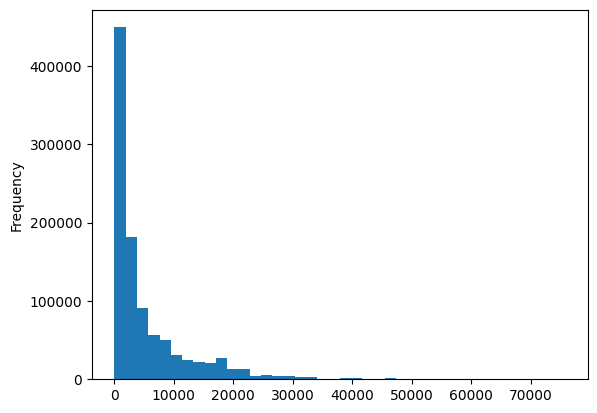

In [201]:
merged_df['CompetitionDistance'].plot.hist(bins=40)

<Axes: ylabel='Frequency'>

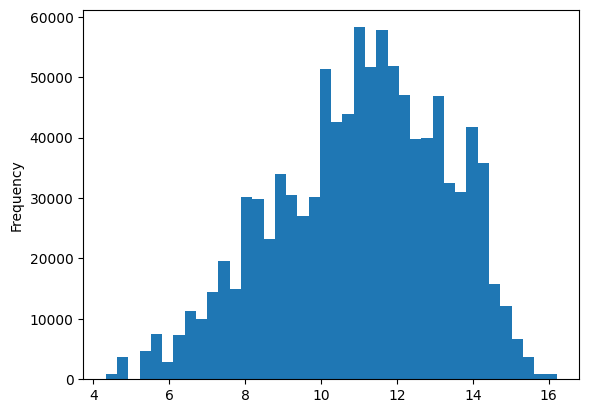

In [220]:
merged_df['LogCompetitionDistance'] = np.log2(merged_df['CompetitionDistance'])
merged_df['LogCompetitionDistance'].plot.hist(bins=40)

<Axes: ylabel='Frequency'>

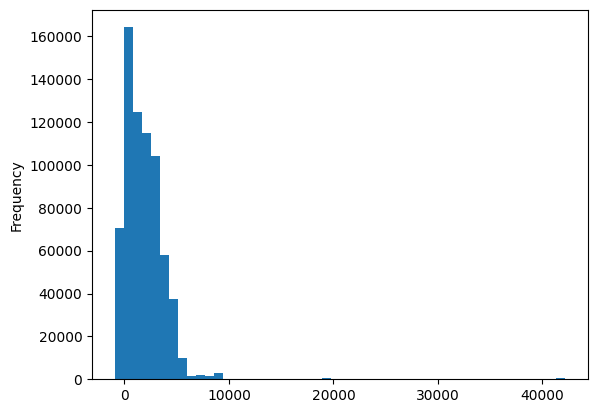

In [203]:
merged_df['CompetitionOpenSinceDays'].plot.hist(bins=50)

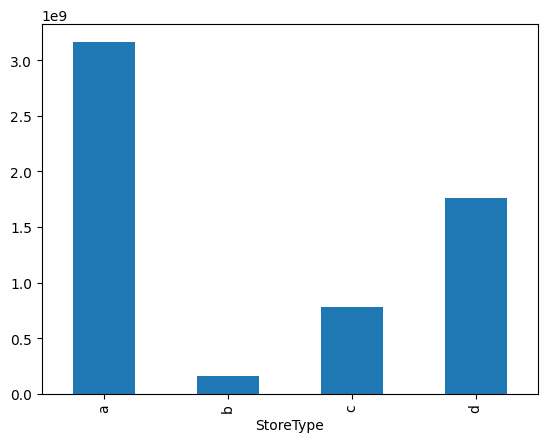

In [196]:
merged_df.groupby('StoreType')['Sales'].sum().plot.bar()
plt.show()

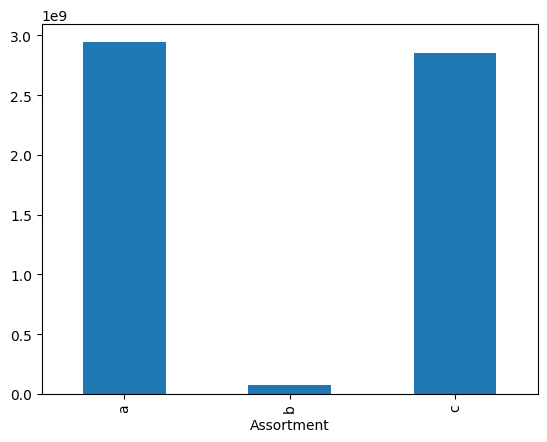

In [197]:
merged_df.groupby('Assortment')['Sales'].sum().plot.bar()
plt.show()

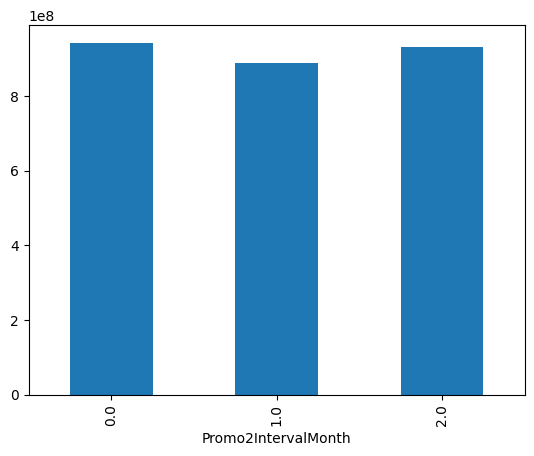

In [193]:
merged_df.groupby('Promo2IntervalMonth')['Sales'].sum().plot.bar()
plt.show()

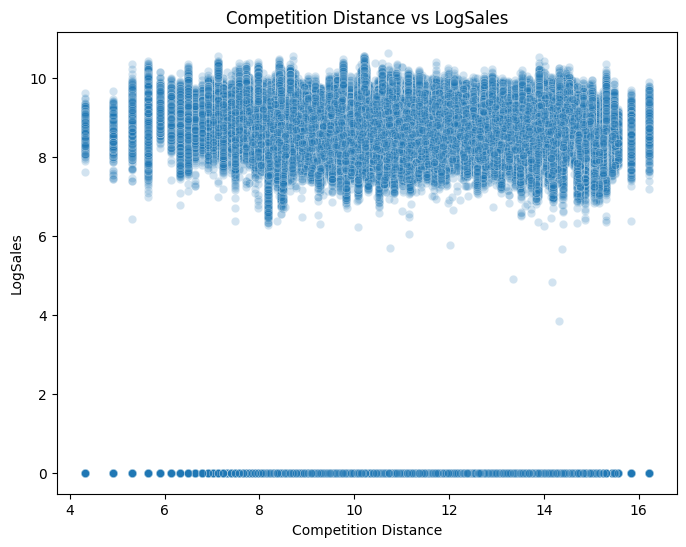

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with transparency
sns.scatterplot(
    x="LogCompetitionDistance", 
    y="LogSales", 
    data=merged_df, 
    alpha=0.2  # Adjust transparency to handle overlapping points
)

plt.title("Competition Distance vs LogSales")
plt.xlabel("Competition Distance")
plt.ylabel("LogSales")  # Log scale for better visualization (if needed)
plt.show()

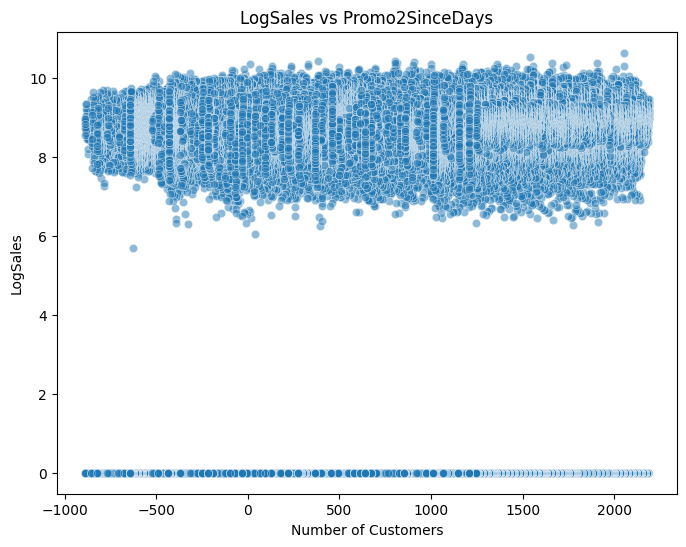

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with transparency
sns.scatterplot(
    x="Promo2SinceDays", 
    y="LogSales", 
    data=merged_df, 
    alpha=0.5  # Adjust transparency to handle overlapping points
)

plt.title("LogSales vs Promo2SinceDays")
plt.xlabel("Promo2Since")
plt.ylabel("LogSales")  # Log scale for better visualization (if needed)
plt.show()

In [63]:
stores_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [227]:
mean_store_sales = merged_df.groupby('Store')['Sales'].mean().rename('StoreMeanSales').reset_index()
mean_store_sales.head()

,Store,StoreMeanSales
0,1,3945.704883
1,2,4122.991507
2,3,5741.253715
3,4,8021.769639
4,5,3867.110403


<Axes: ylabel='Frequency'>

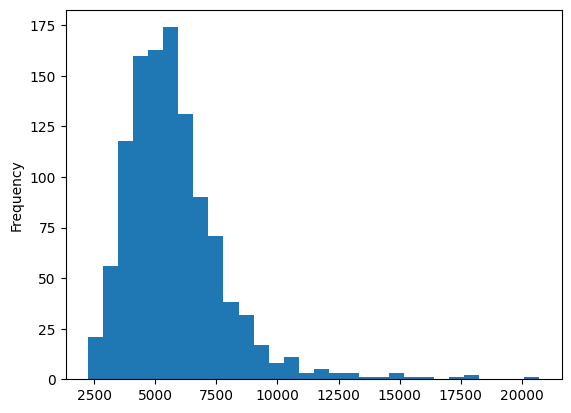

In [233]:
mean_store_sales['StoreMeanSales'].plot.hist(bins=30)

In [229]:
merged_df = merged_df.merge(mean_store_sales, how='left', on='Store')


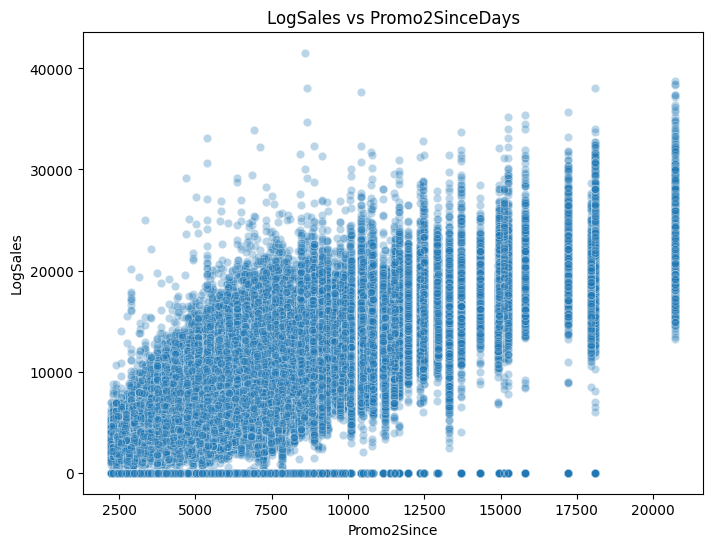

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with transparency
sns.scatterplot(
    x="StoreMeanSales", 
    y="Sales", 
    data=merged_df, 
    alpha=0.3  # Adjust transparency to handle overlapping points
)

plt.title("LogSales vs Promo2SinceDays")
plt.xlabel("Promo2Since")
plt.ylabel("LogSales")  # Log scale for better visualization (if needed)
plt.show()

In [236]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,LogSales,LogCustomers,StoreType,Assortment,CompetitionDistance,Promo2IntervalMonth,CompetitionOpenSinceDays,Promo2SinceDays,LogCompetitionDistance,StoreMeanSales
0,1,5,2015-07-31,5263,555,1,1,none,1,7,8.568646,6.320768,c,a,1270.0,NaN,2524.0,NaN,10.310613,3945.704883
1,2,5,2015-07-31,6064,625,1,1,none,1,7,8.710290,6.439350,a,a,570.0,0.0,2829.0,1950.0,9.154818,4122.991507
2,3,5,2015-07-31,8314,821,1,1,none,1,7,9.025816,6.711740,a,a,14130.0,0.0,3164.0,1579.0,13.786474,5741.253715
3,4,5,2015-07-31,13995,1498,1,1,none,1,7,9.546527,7.312553,c,c,620.0,NaN,2159.0,NaN,9.276124,8021.769639
4,5,5,2015-07-31,4822,559,1,1,none,1,7,8.481151,6.327937,a,a,29910.0,NaN,121.0,NaN,14.868340,3867.110403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,a,a,1900.0,0.0,-516.0,-216.0,10.891784,4342.968153
1017205,1112,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,c,c,1880.0,NaN,2467.0,NaN,10.876517,8465.280255
1017206,1113,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,a,c,9260.0,NaN,NaN,NaN,13.176796,5516.180467
1017207,1114,2,2013-01-01,0,0,0,0,public,1,1,0.000000,0.000000,a,c,870.0,NaN,NaN,NaN,9.764872,17200.196391


In [250]:
merged_df['Quarter'] = merged_df['Date'].dt.quarter
merged_df['Year'] = merged_df['Date'].dt.year

In [252]:
store_sales_by_quarter = merged_df.groupby(['Store', 'Year', 'Quarter'])['Sales'].mean().reset_index()
store_sales_by_year

,Store,Year,Quarter,Sales
0,1,2013,1,4431.900000
1,1,2013,2,3842.252747
2,1,2013,3,3861.076087
3,1,2013,4,4210.923913
4,1,2014,1,3841.277778
...,...,...,...,...
11900,1115,2014,3,5418.869565
11901,1115,2014,4,6042.782609
11902,1115,2015,1,5801.200000
11903,1115,2015,2,5828.054945


In [238]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [243]:
print("min: " + str(test_df['Date'].min()))
print("max: " + str(test_df['Date'].max()))

min: 2015-08-01
max: 2015-09-17


In [ ]:
#Avg Sales With Promo, #Avg Sales Without Promo, #Avg Sales Without Promo Monday, # Avg Sales With Promo Monday, # Avg Sales With Without Promo 

In [ ]:
# Proposed model
# y = avg_daily_sales_prev_month*beta1 + avg_sales_prev_quarter*beta2 + (avg_sales_monday*is_monday*beta3) + ... + avg_sales_tuesday*is_sunday*beta4 + ... + avg_sales_promo*beta5 + promo2*beta6